<a href="https://colab.research.google.com/github/akdspw/006958/blob/master/12StepInterveiwSurveyAnalysis_20201128_konlpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


In [2]:
import keras
data_path = '/content/drive/My Drive/Colab Notebooks/data/data.csv'

In [3]:
import pandas as pd  
df = pd.read_csv(data_path, chunksize=1, header=None, encoding='utf-8')
# df = pd.read_csv('./data.csv', chunksize=1, header=None, encoding='utf-8')

In [4]:
lines = []
for line in pd.read_csv(data_path, encoding='utf-8', header=None, chunksize=1):
    lines.append(line.iloc[0,0])

In [5]:
lines

['1)회복에는 시간이 필요하고,  중독에 있는 때는 정서적 으로 불안정했음',
 '2)지속적으로 변화하는 것을 느끼게 되었음  ',
 '3)모임에 참여하는 기간이 길어지면서 조금씩 신뢰가 쌓이고 관계가 회복됨  ',
 '4)화의 문제가 배우자 때문이 아니라 나의 내면의 문제라는  것을 받아들이는데 많은 시간이 필요했음  ',
 '5)모임에 참여하면서 이전에 아픔이 많이 치유가 되었음',
 '6)화, 두려움, 불안의 문제가 남편 때문이 아니라 나의 내면의 문제라는 것을 볼 수 있게됨  ',
 '7)두려움과 화의 문제가 나의 내면의 문제 라는 것을 인정하게 되었음  ',
 '8)두려움과 화가 남편때문이 아니라 나의 내면의 문제라 는 것을 알게 되었음  ',
 '9)모임에 참여하면서 감정을 문제가 나의 내면에서 일어나는 문제라는 것을 알게 되었 고 그래서 내 안의 화를 조절하기 위해서 노력함',
 '10)정서적으로 안정이 되고, 신앙이 다시 회복되고 있음  ',
 '11)하나님을 만나게 되었고 슬픔과 나에 대한 실망하는 마음이 사리지게 되었음  ',
 '12)중독행위를 멈추는 것에서 영혼육이 치유되는 과정을 경험하게 되어짐   ',
 '13)모임에 나오면서 신앙을 갖게 되고, 화를 내는 것이  죄를 짖는 것이라는 것을 알게 되었고, 분노를 누그러 뜨리게 되었음  ',
 '14)대부분의 감정조절이 제 자리에 돌아오게 되었음  ',
 '15)감정에 끌리지 않고 정직하게 상대방을 대하기 시작하면서 올바르지 않는 것에 대해 거절하는 것이 쉬워졌음 ',
 '16)·힘들었던 정서가 떨어져 나갔고, 더 이상 정서에 노예가 되지 자유한 삶을 살고 있음. ',
 '17)남편의 중독으로 부정적인 감정에 지배를 받았고, 회복되면서 나의 감정을 알아주게 되었음   ',
 '18)감정에 휘말려서 지냈으나,  남편과 분리 시키면서 감정을 조절할 수 있게 되었음   ',
 '19)화를 내면서 자신의 열등감을 숨기려고 했음 ',
 '20)남편이 중독 중일 때에는 자존감이 바닥이었고 늘 화가 

In [6]:
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

pre_corpus_text = clean_text(lines)

In [7]:
pre_corpus_text

[')회복에는 시간이 필요하고, 중독에 있는 때는 정서적 으로 불안정했음',
 ')지속적으로 변화하는 것을 느끼게 되었음',
 ')모임에 참여하는 기간이 길어지면서 조금씩 신뢰가 쌓이고 관계가 회복됨',
 ')화의 문제가 배우자 때문이 아니라 나의 내면의 문제라는 것을 받아들이는데 많은 시간이 필요했음',
 ')모임에 참여하면서 이전에 아픔이 많이 치유가 되었음',
 ')화, 두려움, 불안의 문제가 남편 때문이 아니라 나의 내면의 문제라는 것을 볼 수 있게됨',
 ')두려움과 화의 문제가 나의 내면의 문제 라는 것을 인정하게 되었음',
 ')두려움과 화가 남편때문이 아니라 나의 내면의 문제라 는 것을 알게 되었음',
 ')모임에 참여하면서 감정을 문제가 나의 내면에서 일어나는 문제라는 것을 알게 되었 고 그래서 내 안의 화를 조절하기 위해서 노력함',
 ')정서적으로 안정이 되고, 신앙이 다시 회복되고 있음',
 ')하나님을 만나게 되었고 슬픔과 나에 대한 실망하는 마음이 사리지게 되었음',
 ')중독행위를 멈추는 것에서 영혼육이 치유되는 과정을 경험하게 되어짐',
 ')모임에 나오면서 신앙을 갖게 되고, 화를 내는 것이 죄를 짖는 것이라는 것을 알게 되었고, 분노를 누그러 뜨리게 되었음',
 ')대부분의 감정조절이 제 자리에 돌아오게 되었음',
 ')감정에 끌리지 않고 정직하게 상대방을 대하기 시작하면서 올바르지 않는 것에 대해 거절하는 것이 쉬워졌음',
 ')·힘들었던 정서가 떨어져 나갔고, 더 이상 정서에 노예가 되지 자유한 삶을 살고 있음.',
 ')남편의 중독으로 부정적인 감정에 지배를 받았고, 회복되면서 나의 감정을 알아주게 되었음',
 ')감정에 휘말려서 지냈으나, 남편과 분리 시키면서 감정을 조절할 수 있게 되었음',
 ')화를 내면서 자신의 열등감을 숨기려고 했음',
 ')남편이 중독 중일 때에는 자존감이 바닥이었고 늘 화가 나 있었음',
 ')남편이 중독일 때에는 너무 외롭고 자존감이 떨어져 깊은 우울을 경험함',
 ')남편때문에 두려움과 분

In [8]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 40.7MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [9]:
from konlpy.tag import Okt
okt = Okt()

In [10]:
data_word=[]
for i in range(len(pre_corpus_text)):
    try:
        data_word.append(okt.nouns(pre_corpus_text[i]))
    except Exception as e:
        continue

In [11]:
data_word

[['회복', '시간', '중독', '때', '정서'],
 ['지속', '변화', '것'],
 ['모임', '참여', '기간', '신뢰', '관계', '회복'],
 ['화의', '문제', '배우자', '때문', '나', '내면', '문제', '것', '시간'],
 ['모임', '참여', '이전', '아픔', '치유'],
 ['화', '두려움', '불안', '문제', '남편', '때문', '나', '내면', '문제', '것', '볼', '수'],
 ['두려움', '화의', '문제', '나', '내면', '문제', '것', '인정'],
 ['두려움', '화가', '남편', '때문', '나', '내면', '문제', '것', '알'],
 ['모임',
  '참여',
  '감정',
  '문제',
  '나',
  '내면',
  '문제',
  '것',
  '알',
  '고',
  '내',
  '안',
  '화',
  '조절',
  '위해',
  '노력',
  '함'],
 ['정서', '안정', '신앙', '다시', '회복'],
 ['하나님', '슬픔', '나', '대한', '마음', '사리', '지게'],
 ['중독', '행위', '것', '영혼', '육이', '치유', '과정', '경험', '짐'],
 ['모임', '신앙', '화', '것', '죄', '것', '것', '알', '분노', '누', '리'],
 ['대부분', '감정', '조절', '제', '자리'],
 ['감정', '상대방', '대하', '기', '시작', '것', '대해', '거절', '것'],
 ['정서', '더', '이상', '정서', '노예', '자유', '삶', '살'],
 ['남편', '중독', '부정', '감정', '지배', '회복', '나', '감정'],
 ['감정', '휘', '남편', '분리', '감정', '조절', '수'],
 ['화', '내면', '자신', '열등감'],
 ['남편', '중독', '중일', '때', '자존감', '바닥', '늘', '화가', '나'],
 ['남편', '중

In [12]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=3019df44c1cddce1830716926e787c42dac6e2d41809c350ab82e83ebf9bcf57
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [13]:
from konlpy.tag import Mecab 
from tqdm import tqdm 
import re 
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pickle 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
  coherence_values = [] 
  model_list = [] 
  for num_topics in range(start, limit, step): 
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics) 
    model_list.append(model) 
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
    coherence_values.append(coherencemodel.get_coherence()) 
  return model_list, coherence_values

In [14]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
  limit = 20; 
  start = 2; 
  step = 6; 
  model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
  x = range(start, limit, step) 
  plt.plot(x, coherence_values) 
  plt.xlabel("Num Topics") 
  plt.ylabel("Coherence score") 
  plt.legend(("coherence_values"), loc='best')
  plt.show()


2020-11-29 03:43:59,363 : INFO : using symmetric alpha at 0.5
2020-11-29 03:43:59,369 : INFO : using symmetric eta at 0.5
2020-11-29 03:43:59,371 : INFO : using serial LDA version on this node
2020-11-29 03:43:59,376 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 182 documents, updating model once every 182 documents, evaluating perplexity every 182 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-29 03:43:59,377 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


Number of unique tokens: 352
Number of documents: 182


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

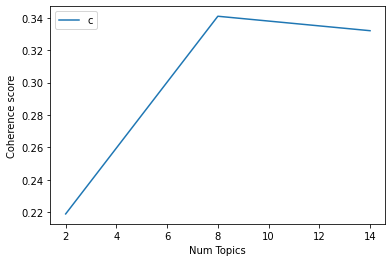

In [15]:
if __name__ == '__main__': 
  #processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())]
  # 정수 인코딩과 빈도수 생성 
  dictionary = corpora.Dictionary(data_word) # 출현빈도가 적거나 자주 등장하는 단어는 제거 dictionary.filter_extremes(no_below=10, no_above=0.05) 
  corpus = [dictionary.doc2bow(text) for text in data_word] 
  print('Number of unique tokens: %d' % len(dictionary)) 
  print('Number of documents: %d' % len(corpus)) 
  logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) # 최적의 토픽 수 찾기 
  find_optimal_number_of_topics(dictionary, corpus, data_word)


In [16]:
from konlpy.tag import Mecab 
from tqdm import tqdm 
import re 
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pickle
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

if __name__ == '__main__': 
  #processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())] # 정수 인코딩과 빈도수 생성 dictionary = corpora.Dictionary(processed_data) # 출현빈도가 적거나 자주 등장하는 단어는 제거
  dictionary = corpora.Dictionary(data_word) 
  corpus = [dictionary.doc2bow(text) for text in data_word] 
  print('Number of unique tokens: %d' % len(dictionary)) 
  print('Number of documents: %d' % len(corpus)) 
  logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) # 최적의 토픽 수 찾기 => 14개로 나옴 # find_optimal_number_of_topics(dictionary, corpus, processed_data) # exit()
  
  perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell') 
  coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell') 
  lda_model = LdaModel(corpus, id2word=dictionary, num_topics=5, passes=30, callbacks=[coherence_logger, perplexity_logger]) 

  topics = lda_model.print_topics(num_words=5) 
  for topic in topics: 
    print(topic) # Compute Coherence Score using c_v 

  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_word, dictionary=dictionary, coherence='c_v') 
  coherence_lda = coherence_model_lda.get_coherence() 
  print('\nCoherence Score (c_v): ', coherence_lda) 

  # Compute Coherence Score using UMass
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_word, dictionary=dictionary, coherence="u_mass") 
  coherence_lda = coherence_model_lda.get_coherence() 
  print('\nCoherence Score (u_mass): ', coherence_lda) # 저장 

  # pickle.dump(corpus, open('./data/lda/lda_corpus.pkl', 'wb')) 
  #dictionary.save('./data/lda/lda_dictionary.gensim') 
  ##da_model.save('./data/lda/lda_model.gensim') # pyLDAvis html 저장 
  #########lda_visualization = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False) 
  #pyLDAvis.save_html(lda_visualization, './data/lda/lda.html') 
  ########pyLDAvis.show(lda_visualization)


2020-11-29 03:44:29,471 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-29 03:44:29,477 : INFO : built Dictionary(352 unique tokens: ['때', '시간', '정서', '중독', '회복']...) from 182 documents (total 1472 corpus positions)
2020-11-29 03:44:29,480 : INFO : using symmetric alpha at 0.2
2020-11-29 03:44:29,481 : INFO : using symmetric eta at 0.2
2020-11-29 03:44:29,484 : INFO : using serial LDA version on this node
2020-11-29 03:44:29,486 : INFO : running online (multi-pass) LDA training, 5 topics, 30 passes over the supplied corpus of 182 documents, updating model once every 182 documents, evaluating perplexity every 182 documents, iterating 50x with a convergence threshold of 0.001000
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthe

Number of unique tokens: 352
Number of documents: 182


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

(0, '0.114*"것" + 0.054*"문제" + 0.049*"중독" + 0.047*"내" + 0.042*"수"')
(1, '0.063*"회복" + 0.056*"것" + 0.041*"하나님" + 0.038*"아내" + 0.037*"알"')
(2, '0.082*"남편" + 0.033*"함" + 0.031*"노력" + 0.029*"위해" + 0.028*"것"')
(3, '0.067*"중독" + 0.047*"남편" + 0.028*"감정" + 0.028*"이" + 0.027*"것"')
(4, '0.065*"남편" + 0.064*"중독" + 0.062*"회복" + 0.047*"수" + 0.034*"때"')

Coherence Score (c_v):  0.3357135862342086

Coherence Score (u_mass):  -8.262130173096441


In [17]:
from gensim import corpora, models
import gensim


ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=7, id2word = dictionary, passes=30)

import pickle
import pyLDAvis.gensim
ldamodel.save('model1.gensim')
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model1.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [18]:

lda = gensim.models.ldamodel.LdaModel.load('model1.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2020-11-29 03:50:43,436 : INFO : loading LdaModel object from model1.gensim
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
2020-11-29 03:50:43,440 : INFO : loading expElogbeta from model1.gensim.expElogbeta.npy with mmap=None
2020-11-29 03:50:43,443 : INFO : setting ignored attribute id2word to None
2020-11-29 03:50:43,445 : INFO : setting ignored attribute dispatcher to None
2020-11-29 03:50:43,446 : INFO : setting ignored attribute state to None
2020-11-29 03:50:43,448 : INFO : loaded model1.gensim
2020-11-29 03:50:43,450 : INFO : loading LdaState object from model1.gensim.state
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologie

In [19]:
from konlpy.tag import Okt
okt = Okt()

In [20]:
data_word=[]
for i in range(len(pre_corpus_text)):
    try:
        data_word.append(okt.nouns(pre_corpus_text[i]))
    except Exception as e:
        continue

In [21]:
print(data_word)

[['회복', '시간', '중독', '때', '정서'], ['지속', '변화', '것'], ['모임', '참여', '기간', '신뢰', '관계', '회복'], ['화의', '문제', '배우자', '때문', '나', '내면', '문제', '것', '시간'], ['모임', '참여', '이전', '아픔', '치유'], ['화', '두려움', '불안', '문제', '남편', '때문', '나', '내면', '문제', '것', '볼', '수'], ['두려움', '화의', '문제', '나', '내면', '문제', '것', '인정'], ['두려움', '화가', '남편', '때문', '나', '내면', '문제', '것', '알'], ['모임', '참여', '감정', '문제', '나', '내면', '문제', '것', '알', '고', '내', '안', '화', '조절', '위해', '노력', '함'], ['정서', '안정', '신앙', '다시', '회복'], ['하나님', '슬픔', '나', '대한', '마음', '사리', '지게'], ['중독', '행위', '것', '영혼', '육이', '치유', '과정', '경험', '짐'], ['모임', '신앙', '화', '것', '죄', '것', '것', '알', '분노', '누', '리'], ['대부분', '감정', '조절', '제', '자리'], ['감정', '상대방', '대하', '기', '시작', '것', '대해', '거절', '것'], ['정서', '더', '이상', '정서', '노예', '자유', '삶', '살'], ['남편', '중독', '부정', '감정', '지배', '회복', '나', '감정'], ['감정', '휘', '남편', '분리', '감정', '조절', '수'], ['화', '내면', '자신', '열등감'], ['남편', '중독', '중일', '때', '자존감', '바닥', '늘', '화가', '나'], ['남편', '중', '독일', '때', '외', '자존감', '우울', '경험', '함'], ['남편', '

In [22]:
from konlpy.tag import Twitter 
from collections import Counter

In [23]:
file = open(data_path, 'r')
lists = file.readlines()
file.close()
lists

['\ufeff"1)회복에는 시간이 필요하고,  중독에 있는 때는 정서적 으로 불안정했음"\n',
 '2)지속적으로 변화하는 것을 느끼게 되었음  \n',
 '3)모임에 참여하는 기간이 길어지면서 조금씩 신뢰가 쌓이고 관계가 회복됨  \n',
 '4)화의 문제가 배우자 때문이 아니라 나의 내면의 문제라는  것을 받아들이는데 많은 시간이 필요했음  \n',
 '5)모임에 참여하면서 이전에 아픔이 많이 치유가 되었음\n',
 '"6)화, 두려움, 불안의 문제가 남편 때문이 아니라 나의 내면의 문제라는 것을 볼 수 있게됨  "\n',
 '7)두려움과 화의 문제가 나의 내면의 문제 라는 것을 인정하게 되었음  \n',
 '8)두려움과 화가 남편때문이 아니라 나의 내면의 문제라 는 것을 알게 되었음  \n',
 '9)모임에 참여하면서 감정을 문제가 나의 내면에서 일어나는 문제라는 것을 알게 되었 고 그래서 내 안의 화를 조절하기 위해서 노력함\n',
 '"10)정서적으로 안정이 되고, 신앙이 다시 회복되고 있음  "\n',
 '11)하나님을 만나게 되었고 슬픔과 나에 대한 실망하는 마음이 사리지게 되었음  \n',
 '12)중독행위를 멈추는 것에서 영혼육이 치유되는 과정을 경험하게 되어짐   \n',
 '"13)모임에 나오면서 신앙을 갖게 되고, 화를 내는 것이  죄를 짖는 것이라는 것을 알게 되었고, 분노를 누그러 뜨리게 되었음  "\n',
 '14)대부분의 감정조절이 제 자리에 돌아오게 되었음  \n',
 '15)감정에 끌리지 않고 정직하게 상대방을 대하기 시작하면서 올바르지 않는 것에 대해 거절하는 것이 쉬워졌음 \n',
 '"16)·힘들었던 정서가 떨어져 나갔고, 더 이상 정서에 노예가 되지 자유한 삶을 살고 있음. "\n',
 '"17)남편의 중독으로 부정적인 감정에 지배를 받았고, 회복되면서 나의 감정을 알아주게 되었음   "\n',
 '"18)감정에 휘말려서 지냈으나,  남편과 분리 시키면서 감정을 조절할 수 있게 되었음   "\n',
 '19)화를 내면서

In [24]:
twitter = Twitter() 
morphs = [] 

for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('\ufeff', 'Foreign'), ('"', 'Punctuation'), ('1', 'Number'), (')', 'Punctuation'), ('회복', 'Noun'), ('에는', 'Josa'), ('시간', 'Noun'), ('이', 'Josa'), ('필요하고', 'Adjective'), (',', 'Punctuation'), ('중독', 'Noun'), ('에', 'Josa'), ('있는', 'Adjective'), ('때', 'Noun'), ('는', 'Josa'), ('정서', 'Noun'), ('적', 'Suffix'), ('으로', 'Josa'), ('불안정했음', 'Adjective'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('2', 'Number'), (')', 'Punctuation'), ('지속', 'Noun'), ('적', 'Suffix'), ('으로', 'Josa'), ('변화', 'Noun'), ('하는', 'Verb'), ('것', 'Noun'), ('을', 'Josa'), ('느끼게', 'Verb'), ('되었음', 'Verb')], [('3', 'Number'), (')', 'Punctuation'), ('모임', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('하는', 'Verb'), ('기간', 'Noun'), ('이', 'Josa'), ('길어지면서', 'Verb'), ('조금씩', 'Adverb'), ('신뢰', 'Noun'), ('가', 'Josa'), ('쌓이고', 'Verb'), ('관계', 'Noun'), ('가', 'Josa'), ('회복', 'Noun'), ('됨', 'Verb')], [('4', 'Number'), (')', 'Punctuation'), ('화의', 'Noun'), ('문제', 'Noun'), ('가', 'Josa'), ('배우자', 'Noun'), ('때문', 'Noun'), ('이', 'Josa'), ('아니라

In [25]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['회복', '시간', '중독', '때', '정서', '지속', '변화', '모임', '참여', '기간', '신뢰', '관계', '회복', '화의', '문제', '배우자', '때문', '문제', '시간', '모임', '참여', '이전', '아픔', '치유', '화', '두려움', '불안', '문제', '남편', '때문', '문제', '볼', '두려움', '화의', '문제', '문제', '인정', '두려움', '화가', '남편', '때문', '문제', '알', '모임', '참여', '감정', '문제', '문제', '알', '고', '안', '화', '조절', '위해', '노력', '함', '정서', '안정', '신앙', '다시', '회복', '슬픔', '대한', '마음', '사리', '중독', '행위', '영혼', '육이', '치유', '과정', '경험', '짐', '모임', '신앙', '화', '죄', '알', '분노', '누', '리', '대부분', '감정', '조절', '제', '자리', '감정', '상대방', '대하', '기', '시작', '대해', '거절', '정서', '더', '이상', '정서', '노예', '자유', '삶', '살', '남편', '중독', '부정', '감정', '지배', '회복', '감정', '감정', '휘', '남편', '분리', '감정', '조절', '화', '자신', '열등감', '남편', '중독', '중일', '때', '자존감', '바닥', '늘', '화가', '남편', '중', '독일', '때', '외', '자존감', '우울', '경험', '함', '남편', '때문', '두려움', '분노', '시간', '자신감', '이기심', '때문', '화', '알', '중독', '회복', '정서', '문제', '해결', '자신', '알', '중독', '때', '정상', '삶', '살', '때문', '늘', '화의', '문제', '중독', '깊이', '관련', '알', '중독', '때', '감정', '이', '삶', '약물', '취해', 

In [26]:
count = Counter(noun_adj_adv_list)

In [27]:
words = dict(count.most_common())

In [28]:
words

{'가면': 1,
 '가야': 1,
 '가장': 1,
 '가정': 7,
 '가지': 1,
 '가치관': 1,
 '각성': 1,
 '각자': 1,
 '간구': 1,
 '갈등': 3,
 '감': 1,
 '감사': 2,
 '감정': 11,
 '개관': 1,
 '객관': 3,
 '거듭': 1,
 '거의': 1,
 '거절': 5,
 '거짓': 2,
 '걱정': 1,
 '결과': 1,
 '결단': 1,
 '결정': 3,
 '결함': 1,
 '경제': 2,
 '경험': 5,
 '계': 1,
 '계속': 1,
 '고': 8,
 '고마움': 1,
 '고백': 1,
 '고통': 3,
 '공격': 1,
 '과거': 1,
 '과정': 10,
 '관': 2,
 '관계': 6,
 '관련': 1,
 '관점': 1,
 '교만': 2,
 '구별': 1,
 '그': 2,
 '그대로': 2,
 '극단': 1,
 '극복': 1,
 '긍정': 1,
 '기': 1,
 '기간': 1,
 '기억': 1,
 '기회': 1,
 '길': 3,
 '깊이': 1,
 '깨달음': 1,
 '날': 2,
 '남': 2,
 '남편': 72,
 '노력': 13,
 '노예': 1,
 '누': 1,
 '누리': 1,
 '눈': 1,
 '늘': 3,
 '님': 2,
 '다시': 5,
 '단절': 1,
 '단점': 1,
 '단호': 1,
 '대부': 1,
 '대부분': 2,
 '대상': 1,
 '대하': 1,
 '대한': 4,
 '대해': 7,
 '대화': 21,
 '더': 3,
 '더욱': 4,
 '도': 2,
 '도박': 5,
 '도움': 2,
 '도저히': 1,
 '독립': 1,
 '독일': 1,
 '두려움': 5,
 '때': 27,
 '때문': 21,
 '또한': 2,
 '뜻': 2,
 '라면': 1,
 '로': 2,
 '로만': 1,
 '를': 1,
 '리': 1,
 '마는': 1,
 '마음': 7,
 '먼저': 1,
 '면': 1,
 '면서': 3,
 '모두': 2,
 '모든': 4,
 '모면': 1,
 '모음': 

In [30]:
!pip install WordCloud

In [31]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [32]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [34]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)



In [35]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = '/content/drive/My Drive/Colab Notebooks/data/NanumBarunGothic.ttf',    
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


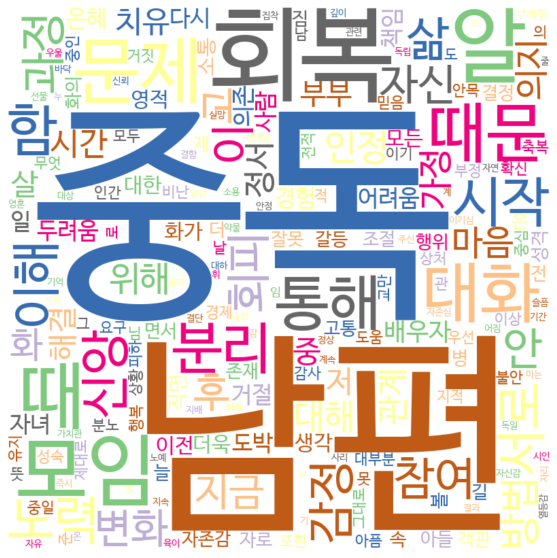

In [36]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')

<class 'numpy.ndarray'>
(800, 800, 3)


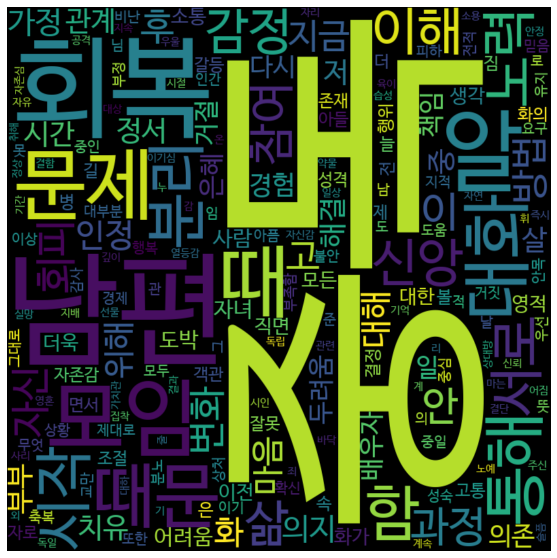

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = '/content/drive/My Drive/Colab Notebooks/data/NanumBarunGothic.ttf',    
    background_color='black',                             # 배경 색깔 정하기
    colormap = 'viridis',                                # 폰트 색깔 정하기
   # colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')

<class 'numpy.ndarray'>
(800, 800, 3)


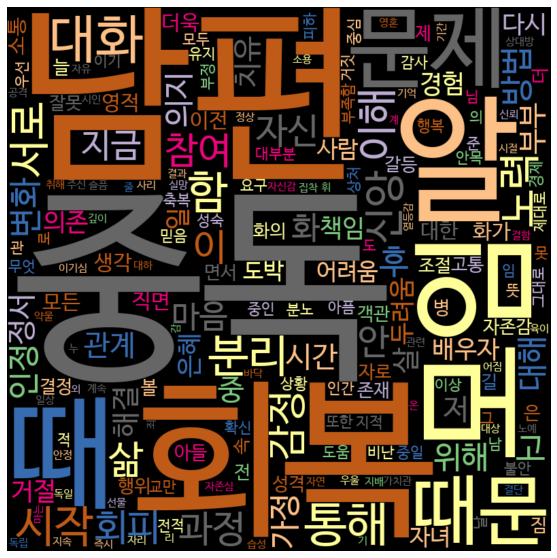

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = '/content/drive/My Drive/Colab Notebooks/data/NanumBarunGothic.ttf',    
    background_color='black',                             # 배경 색깔 정하기
  # colormap = 'viridis',                                # 폰트 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')